In [ ]:
#Add necessary libraries
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.8 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=4df904904940d4844e402b848dfeb3b96f1cf9b1fd7ee76e86e49ce89faeef53
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


In [ ]:
# prompt: upload excel file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving GDSC1_fitted_dose_response_27Oct23.xlsx to GDSC1_fitted_dose_response_27Oct23.xlsx
User uploaded file "GDSC1_fitted_dose_response_27Oct23.xlsx" with length 29353210 bytes


In [ ]:
# prompt: create dataframe for GDSC1_fitted_does_resonse_27Oct23.xlsx

import io

df = pd.read_excel(io.BytesIO(uploaded['GDSC1_fitted_dose_response_27Oct23.xlsx']))


In [ ]:
#View DataFrame
df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


Curate and Clean DataSet

In [ ]:
df

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626
333157,GDSC1,342,15912122,1660035,SNU-61,SIDM00194,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.725399,0.976109,0.045453,1.785602
333158,GDSC1,342,15912431,1660036,SNU-81,SIDM00193,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.930753,0.970851,0.038612,0.637308
333159,GDSC1,342,15912739,1674021,SNU-C5,SIDM00498,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.551784,0.972330,0.042649,0.089683


In [ ]:
# prompt: sort the table using the string SK-MEL-2 only in the CELL_LINE_NAME column

# Filter the DataFrame to include only rows where 'CELL_LINE_NAME' is 'SK-MEL-2'
df_sorted = df[df['CELL_LINE_NAME'] == 'SK-MEL-2']

# Sort the filtered DataFrame (if needed)
# Example: Sort by 'AUC' in ascending order
# sk_mel_2_df = sk_mel_2_df.sort_values('AUC')

# Print the sorted DataFrame
print(df_sorted)


       DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
86       GDSC1             342       15646269     905955       SK-MEL-2   
474      GDSC1             342       15646572     905955       SK-MEL-2   
837      GDSC1             342       15646643     905955       SK-MEL-2   
1234     GDSC1             342       15646658     905955       SK-MEL-2   
1640     GDSC1             342       15646669     905955       SK-MEL-2   
...        ...             ...            ...        ...            ...   
329242   GDSC1             342       15646465     905955       SK-MEL-2   
330105   GDSC1             342       15646466     905955       SK-MEL-2   
330945   GDSC1             342       15646467     905955       SK-MEL-2   
331660   GDSC1             342       15646469     905955       SK-MEL-2   
332493   GDSC1             342       15646470     905955       SK-MEL-2   

       SANGER_MODEL_ID TCGA_DESC  DRUG_ID     DRUG_NAME  \
86           SIDM00082      SKCM        

In [ ]:
# prompt: generate a df_sorted to have these columns only: CELL_LINE_NAME, TCGA_DESC, DRUG_NAME, and LN_IC50

# Select only the desired columns
df_sorted = df_sorted[['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'LN_IC50']]

# Print the updated DataFrame
print(df_sorted)


       CELL_LINE_NAME TCGA_DESC     DRUG_NAME   LN_IC50
86           SK-MEL-2      SKCM     Erlotinib  3.394001
474          SK-MEL-2      SKCM     Rapamycin -1.113085
837          SK-MEL-2      SKCM     Sunitinib  4.013588
1234         SK-MEL-2      SKCM    PHA-665752  3.092390
1640         SK-MEL-2      SKCM        MG-132  2.369072
...               ...       ...           ...       ...
329242       SK-MEL-2      SKCM   Refametinib -1.542607
330105       SK-MEL-2      SKCM    Pictilisib  1.439194
330945       SK-MEL-2      SKCM  Pevonedistat -0.809756
331660       SK-MEL-2      SKCM         PFI-3  5.665698
332493       SK-MEL-2      SKCM      I-CBP112  5.864130

[402 rows x 4 columns]


In [ ]:
import requests
import pandas as pd
import time

# Function to get CID from PubChem using drug name
def get_cid(drug_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/TXT"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    else:
        return None

# Function to get the canonical SMILES from PubChem for a given CID
def get_smiles(cid):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/TXT"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    else:
        return None

# List of drug names (from your provided list)
drug_names = [
    "I-CBP112", "Erlotinib", "Rapamycin", "Sunitinib", "PHA-665752", "MG-132",
    "Paclitaxel", "Cyclopamine", "AZ628", "Sorafenib", "Tozasertib", "Imatinib",
    "NVP-TAE684", "Crizotinib", "Saracatinib", "S-Trityl-L-cysteine", "Z-LLNle-CHO",
    "Dasatinib", "GNF-2", "CGP-60474","CGP-082996","A-770041","WH-4-023","WZ-1-84",
    "BI-2536","BMS-536924","Bleomycin (10 uM)","AZD6738","AZD5438","AZD5438","Dyrk1b_0191","AZD4877","EphB4_9721","Fulvestrant","BAY-MPS-combo-1 (paclitaxel 5 uM)",
    "BAY-MPS-combo 2 (paclitaxel 1 uM)","Trametinib","Dabrafenib","Temozolomide","Bleomycin (50 uM)","ZL109","AZD3514","965-D2","993-D2","BAY ACCi","BAY AKT1",
    "BAY-HDAC11_1","BAY-HDAC11_2","BAY-HDAC11_4","BAY-MPS1","GSK-J4","Talazoparib","rTRAIL","UNC1215","UNC0642","SGC0946","ICL1100013","XAV939","Pazopanib","Pazopanib",
    "Dacinostat", "Epothilone B", "GSK1904529A", "BMS-345541", "Tipifarnib", "Avagacestat", "Ruxolitinib", "Linsitinib", "Bexarotene", "Bleomycin", "LFM-A13", "GW-2580",
    "Luminespib", "Phenformin", "Bryostatin 1", "PAC-1", "IPA-3", "GSK650394", "BAY-61-3606", "5-Fluorouracil", "Thapsigargin", "Obatoclax Mesylate", "BMS-754807", "JQ12",
    "DMOG", "FTI-277", "OSU-03012", "Shikonin", "AKT inhibitor VIII", "Embelin", "FH535", "STF-62247", "NG-25", "TL-1-85", "VX-11e", "FR-180204", "ACY-1215", "Tubastatin A",
    "Zibotentan", "UNC0638", "Cabozantinib", "WZ3105", "XMD14-99", "Quizartinib", "CP724714", "JW-7-24-1", "NPK76-II-72-1", "Genentech Cpd 10", "GSK1070916", "Enzastaurin",
    "GSK429286A", "FMK", "QL-XII-47", "IC-87114", "Idelalisib", "AS601245", "Ispinesib Mesylate", "TL-2-105", "AT-7519", "TAK-715", "BX-912", "ZSTK474", "AS605240",
    "NVP-BHG712", "OSI-930", "OSI-027", "CX-5461", "PHA-793887", "PI-103", "PIK-93", "SB52334", "KIN001-244", "WHI-P97", "KIN001-042", "KIN001-260", "KIN001-266", "Masitinib",
    "Amuvatinib", "MPS-1-IN-1", "Linifanib", "BIX02189", "Alectinib", "Pelitinib", "Omipalisib", "JNJ38877605", "SU11274", "KIN001-236", "Sepantronium bromide", "NSC-207895",
    "VNLG/124", "AR-42", "CUDC-101", "Belinostat", "I-BET-762", "CAY10603", "Pilaralisib", "GSK1059615", "Voxtalisib", "Brivanib, BMS-540215", "BIBF-1120", "AST-1306",
    "Apitolisib", "LIMK1 inhibitor BMS4", "THZ-2-49", "KIN001-270", "THZ-2-102-1", "AT7867", "CI-1033", "PF-00299804", "TWS119", "Torin 2", "SNX-2112", "QL-XI-92", "XMD13-2",
    "QL-X-138", "XMD15-27", "T0901317", "Selisistat", "Tenovin-6", "TPCA-1", "Fedratinib", "Foretinib", "Y-39983", "YM201636", "Tivozanib", "WYE-125132", "GSK690693",
    "LDN-193189", "FTY-720", "BAM7", "AGI-6780", "Kobe2602", "LGK974", "Wnt-C59", "RU-SKI 43", "IMD-0354", "MIM1", "ETP-45835", "CD532", "NSC319726", "ARRY-520", "SB505124",
    "A-83-01", "Pemetrexed", "Alisertib", "Flavopiridol", "C-75", "CAP-232, TT-232, TLN-232", "Trichostatin A","Panobinostat", "LCL161", "kb NB 142-70",
    "Sphingosine Kinase 1 Inhibitor II", "eEF2K Inhibitor, A-484954", "MetAP2 Inhibitor, A832234", "Venotoclax", "CPI-613", "CAY10566", "Ara-G", "VX-702", "Motesanib",
    "KU-55933", "Elesclomol", "Afatinib", "Vismodegib", "PLX-4720", "BX795", "Bosutinib", "Lenalidomide", "Axitinib", "AZD7762", "GW441756", "Lestaurtinib", "SB216763",
    "Tanespimycin", "Navitoclax", "Vorinostat", "Nilotinib", "Refametinib", "CI-1040", "Temsirolimus", "Olaparib", "Veliparib", "AICA Ribonucleotide", "Vinblastine",
    "Cisplatin", "Cytarabine", "Docetaxel", "Methotrexate", "Tretinoin", "Gefitinib", "PF-4708671", "Serdemetan", "AZD4547", "Capivasertib", "HG-5-113-01", "HG-5-88-01",
    "THZ-1-87", "TW 37", "SB590885", "Selumetinib", "CCT007093", "EHT-1864", "CRT0105950", "CRT0105446", "Cetuximab", "FS106", "ZM447439", "RO-3306", "MK-2206", "Palbociclib",
    "Dactolisib", "Pictilisib", "AZD8055", "PD0325901", "NU7441", "SL0101", "Doramapimod", "JNK Inhibitor VIII", "Wee1 Inhibitor", "Nutlin-3a (-)", "Mirin", "PD173074",
    "I-BET-151", "YK-4-279", "(5Z)-7-Oxozeaenol", "Piperlongumine", "Daporinad", "N22899-6-C1", "N23918-95-7", "N24798-49-A1", "ZL049", "FY012", "Tamoxifen", "torin2",
    "QL-XII-61", "HG-6-71-01", "PFI-1", "IOX2", "CRT0160829", "AZ20", "KU-60019", "FS112", "CCT245232", "CCT245467", "FY026", "FY069", "XMD11-50", "XMD11-85h", "ZG-10",
    "XMD8-92", "THZ-2-98-01", "QL-VIII-58", "CCT-018159", "Rucaparib", "PARP_9482", "TANK_1366", "AZD1332", "TTK_3146", "SN-38", "Pevonedistat", "PFI-3", "BMS-509744",
    "AZD8186", "AZD8835", "PI3Ka_4409", "AZD1208", "PLK_6522", "RAF_9304", "PARP_9495", "PARP_0108", "IAP_7638", "IGFR_3801", "AZD1480", "JAK1_3715", "JAK3_7406", "MCT1_6447",
    "MCT4_1422", "AZD2014", "AZD8931", "FEN1_3940", "FGFR_0939", "FGFR_3831", "BPTES", "AZD7969", "AZD5582", "IAP_5620", "Midostaurin", "CHIR-99021", "Ponatinib", "AZD6482",
    "JNK-9L", "PF-562271", "HG6-64-1", "JQ1", "Etoposide", "Gemcitabine", "Mitomycin-C", "Vinorelbine", "NSC-87877", "Bicalutamide", "QS11", "CP466722", "TGX221", "Bortezomib",
    "XMD8-85", "Seliciclib", "Salubrinal", "Lapatinib", "GSK269962A", "Doxorubicin", "CMK", "Pyrimethamine", "JW-7-52-1", "A-443654", "GW843682X", "Entinostat", "Parthenolide",
    "GSK319347A"

]

# Prepare a list to hold the results
results = []

# Loop over each drug name to get its CID and then its canonical SMILES
for drug in drug_names:
    try:
        cid = get_cid(drug)
        if cid:
            smiles = get_smiles(cid)
            results.append({"Drug Name": drug, "CID": cid, "Canonical_SMILES": smiles})
        else:
            results.append({"Drug Name": drug, "CID": None, "Canonical_SMILES": None})

        # Adding a delay to avoid hitting rate limits on PubChem API
        time.sleep(0.2)  # 200 ms delay
    except Exception as e:
        results.append({"Drug Name": drug, "CID": None, "Canonical_SMILES": None})
        print(f"Error retrieving data for {drug}: {e}")

# Create a pandas DataFrame from the results
df_SMILES = pd.DataFrame(results)


In [ ]:
# prompt: Show all the rows of df_SMILES
df_SMILES


,Drug Name,CID,Canonical_SMILES
0,I-CBP112,90488984,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...
1,Erlotinib,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
2,Rapamycin,5284616,CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
3,Sunitinib,5329102,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
4,PHA-665752,10461815,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
...,...,...,...
374,A-443654,10172943,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CNC5=...
375,GW843682X,9826308,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C(=O)N)OCC4=...
376,Entinostat,4261,C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC(=O)OCC3...
377,Parthenolide,7251185\n6473881\n5420804\n4692\n5353864\n5420...,None


In [ ]:
# prompt: remove row with the string None

df_SMILES = df_SMILES.dropna(subset=['Canonical_SMILES'])


In [ ]:
# prompt: concatenate df_SMILES and df_sorted

df_merged = pd.merge(df_sorted, df_SMILES, left_on='DRUG_NAME', right_on='Drug Name', how='inner')
print(df_merged)


    CELL_LINE_NAME TCGA_DESC     DRUG_NAME   LN_IC50     Drug Name       CID  \
0         SK-MEL-2      SKCM     Erlotinib  3.394001     Erlotinib    176870   
1         SK-MEL-2      SKCM     Rapamycin -1.113085     Rapamycin   5284616   
2         SK-MEL-2      SKCM     Sunitinib  4.013588     Sunitinib   5329102   
3         SK-MEL-2      SKCM    PHA-665752  3.092390    PHA-665752  10461815   
4         SK-MEL-2      SKCM        MG-132  2.369072        MG-132    462382   
..             ...       ...           ...       ...           ...       ...   
308       SK-MEL-2      SKCM   Refametinib -1.542607   Refametinib  44182295   
309       SK-MEL-2      SKCM    Pictilisib  1.439194    Pictilisib  17755052   
310       SK-MEL-2      SKCM  Pevonedistat -0.809756  Pevonedistat  16720766   
311       SK-MEL-2      SKCM         PFI-3  5.665698         PFI-3  78243717   
312       SK-MEL-2      SKCM      I-CBP112  5.864130      I-CBP112  90488984   

                                      C

Molecular Descriptor and Model Training

In [ ]:
# prompt: generate table with DRUG_NAME, SMILES, LN_IC50

df_final = df_merged[['DRUG_NAME', 'Canonical_SMILES', 'LN_IC50']]
print(df_final)

        DRUG_NAME                                   Canonical_SMILES   LN_IC50
0       Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...  3.394001
1       Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C... -1.113085
2       Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...  4.013588
3      PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...  3.092390
4          MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...  2.369072
..            ...                                                ...       ...
308   Refametinib  COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C... -1.542607
309    Pictilisib  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...  1.439194
310  Pevonedistat  C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)... -0.809756
311         PFI-3       C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O  5.665698
312      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...  5.864130

[313 rows x 3 columns]


In [ ]:
# prompt: generate lipinksi descriptor table

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        if mol is None:
            return None
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
# prompt: generate molecular descriptors for df_final and add descriptor columns to df_final

descriptors = lipinski(df_final.Canonical_SMILES.values)
df_final = pd.concat([df_final, descriptors], axis=1)
print(df_final)



        DRUG_NAME                                   Canonical_SMILES  \
0       Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...   
1       Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...   
2       Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...   
3      PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...   
4          MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...   
..            ...                                                ...   
308   Refametinib  COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C...   
309    Pictilisib  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...   
310  Pevonedistat  C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...   
311         PFI-3       C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O   
312      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...   

      LN_IC50       MW     LogP  NumHDonors  NumHAcceptors  
0    3.394001  393.443  3.40510         1.0            7.0  
1   -1.113085

In [ ]:
# prompt: slip data into test and train data 80% and 20%

from sklearn.model_selection import train_test_split

# Assuming 'df_final' is your DataFrame with features and target variable
X = df_final.drop('LN_IC50', axis=1)  # Features
y = df_final['LN_IC50']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (250, 6)
X_test shape: (63, 6)
y_train shape: (250,)
y_test shape: (63,)


In [ ]:
#install pycaret
!pip install pycaret

In [ ]:
# prompt: train pycaret model

from pycaret.regression import *

# Prepare the data for PyCaret
data_for_pycaret = df_final
data_for_pycaret = data_for_pycaret.drop(['DRUG_NAME', 'Canonical_SMILES'], axis=1)

# Setup the PyCaret environment
s = setup(data_for_pycaret, target = 'LN_IC50')

# Compare different regression models
best_model = compare_models()



,Description,Value
0,Session id,1743
1,Target,LN_IC50
2,Target type,Regression
3,Original data shape,"(313, 5)"
4,Transformed data shape,"(313, 5)"
5,Transformed train set shape,"(219, 5)"
6,Transformed test set shape,"(94, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2.0543,6.7883,2.5855,-0.0277,0.5284,1.4061,0.0280
llar,Lasso Least Angle Regression,2.0543,6.7883,2.5855,-0.0277,0.5284,1.4061,0.0340
omp,Orthogonal Matching Pursuit,2.0547,6.7886,2.5856,-0.0278,0.5293,1.4067,0.0320
ridge,Ridge Regression,2.0416,6.7785,2.5837,-0.0285,0.5680,1.4288,0.0270
lr,Linear Regression,2.0417,6.7795,2.5839,-0.0287,0.5683,1.4289,0.0290
lar,Least Angle Regression,2.0417,6.7795,2.5839,-0.0287,0.5683,1.4289,0.0270
en,Elastic Net,2.0545,6.8034,2.5885,-0.0300,0.5302,1.4081,0.0270
huber,Huber Regressor,2.0126,6.9129,2.5978,-0.0389,0.5514,1.5763,0.0780
br,Bayesian Ridge,2.0570,6.8681,2.6007,-0.0394,0.5315,1.4118,0.0280
dummy,Dummy Regressor,2.0699,7.1130,2.6451,-0.0756,0.5018,1.3858,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# prompt: evaluate ridge regression on X_test and Y_test usig 3 metrics

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Ridge Regression model
ridge_model = Ridge()

# Train the model on the training data
ridge_model.fit(X_train.drop(['DRUG_NAME', 'Canonical_SMILES'], axis=1), y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test.drop(['DRUG_NAME', 'Canonical_SMILES'], axis=1))

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 8.5540
R-squared (R2): -0.0182
Mean Absolute Error (MAE): 2.2066


Prediction

In [ ]:
# prompt: use ridge regression to predict the IC50 on df_final

# Assuming X_test and ridge_model are already defined from the preceding code.

# Select features for prediction from df_final
X_pred = df_final.drop(['LN_IC50', 'DRUG_NAME', 'Canonical_SMILES'], axis=1)

# Make predictions using the Ridge regression model
y_pred_final = ridge_model.predict(X_pred)

# Add the predicted IC50 values to the df_final DataFrame
df_final['Predicted_IC50'] = y_pred_final

# Print the DataFrame with predicted IC50 values
print(df_final)


        DRUG_NAME                                   Canonical_SMILES  \
0       Erlotinib  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...   
1       Rapamycin  CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...   
2       Sunitinib  CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...   
3      PHA-665752  CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...   
4          MG-132  CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...   
..            ...                                                ...   
308   Refametinib  COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C...   
309    Pictilisib  CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...   
310  Pevonedistat  C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...   
311         PFI-3       C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O   
312      I-CBP112  CCC(=O)N1CCOC2=C(C1)C=C(C=C2OCC3CCCN(C3)C)C4=C...   

      LN_IC50       MW     LogP  NumHDonors  NumHAcceptors  Predicted_IC50  
0    3.394001  393.443  3.40510         1.0            7.0

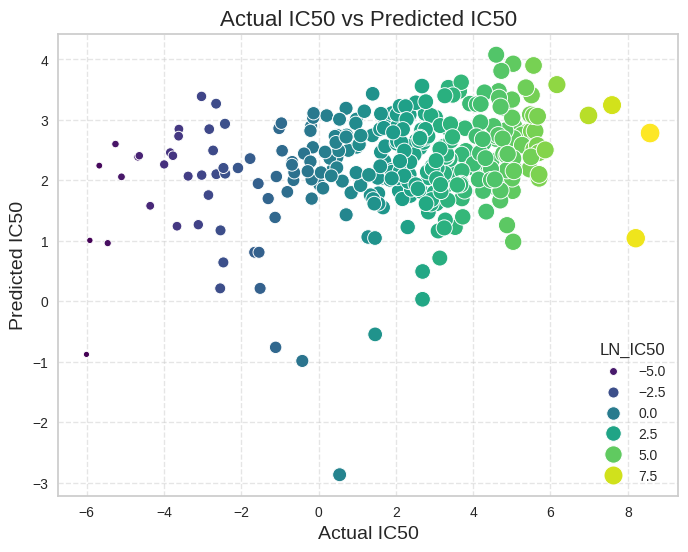

In [ ]:
# prompt: create a scatter plot from predicted IC50 and actual IC50 make it colourful and creative

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a colorful and creative design
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LN_IC50', y='Predicted_IC50', data=df_final, hue='LN_IC50', palette='viridis', size='LN_IC50', sizes=(20, 200))

# Customize the plot
plt.title('Actual IC50 vs Predicted IC50', fontsize=16)
plt.xlabel('Actual IC50', fontsize=14)
plt.ylabel('Predicted IC50', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)



plt.show()


In [ ]:
# prompt: generate the correlation coefficient for the scatter plot

correlation_coefficient = df_final['LN_IC50'].corr(df_final['Predicted_IC50'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")


Correlation Coefficient: 0.2679
